## Plotting relative free energy results from example csv file
#### The example.csv file contains both the experimental absolute free energies, and the calculated relative free energies for a set of  ligands.


In [11]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["savefig.dpi"] = 300

from cinnabar import FEMap, stats
from cinnabar2 import plotting


In [3]:
def graph_and_highlight_hub(csv_path, highlight_ligand):
    """
    Load a FEMap from CSV and return the legacy graph and highlight indices
    for a specific ligand.

    Parameters:
    - csv_path (str): Path to the CSV file
    - highlight_ligand (str): Ligand name to highlight (e.g., 'lig2')

    Returns:
    - graph: NetworkX graph
    - highlight_indices (List[int]): Indices of edges involving the ligand
    """
    fe = FEMap.from_csv(csv_path)
    graph = fe.to_legacy_graph()

    for node in graph.nodes:
        graph.nodes[node]['name'] = node  # Ensure labels

    edges = list(graph.edges(data=True))

    highlight_indices = [
        i for i, (u, v, _) in enumerate(edges)
        if highlight_ligand in (u, v)
    ]

    return graph, highlight_indices

In [12]:
fe = FEMap.from_csv('../cinnabar/data/mac1_SepTop_wout_frags.csv')

/opt/anaconda3/envs/test-cinnabar/lib/python3.12/site-packages/cinnabar/femap.py:35: UserWarning: Assuming kcal/mol units on measurements
  warnings.warn("Assuming kcal/mol units on measurements")


Figure saved as mac1_septop_ddg.png


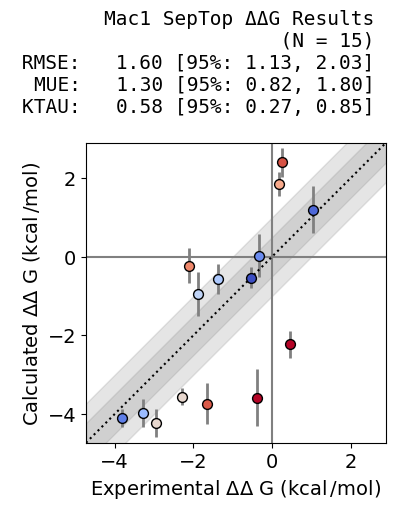

In [7]:
plotting.plot_DDGs(
    fe.to_legacy_graph(),
    figsize=5,
    font_sizes={"title": 14, "labels": 16, "other": 14}, 
    scatter_kwargs={"s":50, "marker": "o", "edgecolors": "k"}, 
    units=r"$\mathrm{kcal\,/mol^{}}$", 
    title='Mac1 SepTop ΔΔG Results', 
    filename='mac1_septop_ddg.png')

In [8]:
csv_path = '../cinnabar/data/mac1_fragments_SepTop_wout_frags.csv'
highlight_ligand = 'Z9604'
graph, highlight_indices =  graph_and_highlight_hub(csv_path, highlight_ligand)

NameError: name 'graph_and_highlight_hub' is not defined

Figure saved as mac1_septop_hightlight_ddg.png


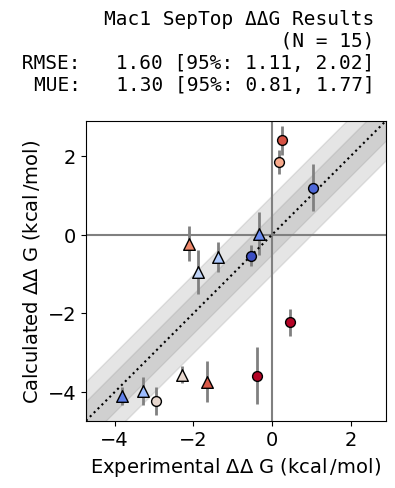

In [7]:
plotting.plot_DDGs(
    graph,
    figsize=5,
    font_sizes={"title": 14, "labels": 16, "other": 14},
    scatter_kwargs={"s": 50, "marker": "o", "edgecolors": "k"},
    highlight_indices=highlight_indices,              
    highlight_marker="^",                              
    highlight_scatter_kwargs={"s": 70, "edgecolors": "k"},
    units=r"$\mathrm{kcal\,/mol^{}}$", 
    title='Mac1 SepTop ΔΔG Results',
    filename='mac1_septop_highlight_ddg.png')

In [13]:
rel_df = fe.get_relative_dataframe()

rel_df.to_csv("septop_mac1_relative_values.csv", index=False)

Figure saved as mac1_septop_dg.png


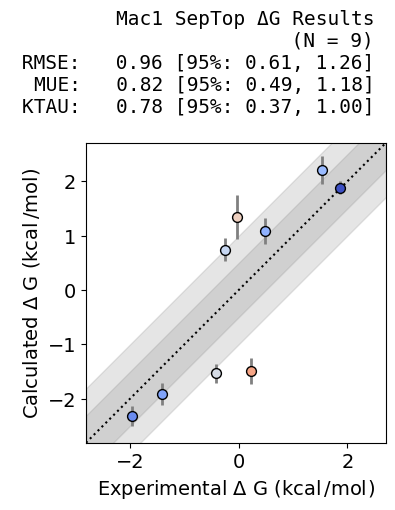

In [18]:
plotting.plot_DGs(
    fe.to_legacy_graph(),
    figsize=5,
    font_sizes={"title": 14, "labels": 16, "other": 14}, 
    scatter_kwargs={"s":50, "marker": "o", "edgecolors": "k"}, 
    units=r"$\mathrm{kcal\,/mol^{}}$", 
    title='Mac1 SepTop ΔG Results', 
    filename='mac1_septop_dg.png')

In [14]:
#generate absolute free energies
fe.generate_absolute_values()
#get the df
abs_df = fe.get_absolute_dataframe()
#format all float columns to 2 decimal places
for col in abs_df.select_dtypes(include=['float']):
    abs_df[col] = abs_df[col].map(lambda x: f"{x:.2f}")
#save to CSV
abs_df.to_csv("septop_mac1_absolute_values.csv", index=False)